In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
mnist_train = pd.read_csv("datasets/mnist-in-csv/mnist_train.csv")
mnist_test = pd.read_csv("datasets/mnist-in-csv/mnist_test.csv")

In [3]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [4]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
img = mnist_train[1:2]
img = img.drop("label", axis=1)

In [6]:
img = img.values
img.shape

(1, 784)

In [7]:
img = img.reshape(1, 28, 28)
img.shape

(1, 28, 28)

In [8]:
img = img.squeeze()
img.shape

(28, 28)

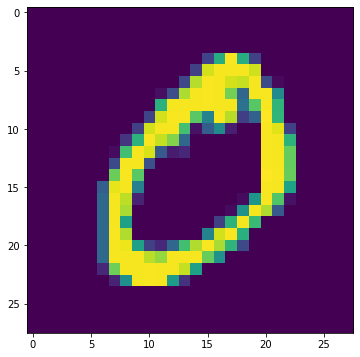

In [9]:
plt.figure(figsize=(6, 6))
plt.imshow(img);

In [10]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [11]:
mnist_train_features = mnist_train.drop("label", axis=1)
mnist_train_target = mnist_train["label"]

mnist_test_features = mnist_test.drop("label", axis=1)
mnist_test_target = mnist_test["label"]

In [12]:
print("train max - ", mnist_train.values.max())
print("train min - ", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min - ", mnist_test.values.min())

train max -  255
train min -  0
test max -  255
test min -  0


In [13]:
mnist_train = mnist_train.astype("float32")
mnist_train = mnist_train / 255

In [14]:
mnist_test = mnist_test.astype("float32")
mnist_test = mnist_test / 255

In [15]:
print("train max - ", mnist_train.values.max())
print("train min - ", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min - ", mnist_test.values.min())

train max -  1.0
train min -  0.0
test max -  1.0
test min -  0.0


In [16]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [17]:
X_train_tensor.shape, Y_train_tensor.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [18]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

In [19]:
input_size = 784
output_size = 10

hidden1_size = 16
hidden2_size = 32

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))

        x = self.fc3(x)

        return torch.log_softmax(x, dim=-1)

In [21]:
model = Net()

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [23]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [24]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [25]:
optimizer = optim.Adam(model.parameters())
loss_fn = nn.NLLLoss()

In [26]:
epochs = 500

In [27]:
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    Y_pred = model(X_train_tensor)

    loss = loss_fn(Y_pred, Y_train_tensor)
    loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        print("Epoch - %d, loss - %0.2f " % (epoch, loss.item()))

Epoch - 10, loss - 2.25 
Epoch - 20, loss - 2.21 
Epoch - 30, loss - 2.17 
Epoch - 40, loss - 2.13 
Epoch - 50, loss - 2.09 
Epoch - 60, loss - 2.04 
Epoch - 70, loss - 1.99 
Epoch - 80, loss - 1.94 
Epoch - 90, loss - 1.88 
Epoch - 100, loss - 1.82 
Epoch - 110, loss - 1.76 
Epoch - 120, loss - 1.70 
Epoch - 130, loss - 1.63 
Epoch - 140, loss - 1.57 
Epoch - 150, loss - 1.51 
Epoch - 160, loss - 1.45 
Epoch - 170, loss - 1.39 
Epoch - 180, loss - 1.34 
Epoch - 190, loss - 1.29 
Epoch - 200, loss - 1.23 
Epoch - 210, loss - 1.19 
Epoch - 220, loss - 1.14 
Epoch - 230, loss - 1.09 
Epoch - 240, loss - 1.05 
Epoch - 250, loss - 1.01 
Epoch - 260, loss - 0.97 
Epoch - 270, loss - 0.93 
Epoch - 280, loss - 0.90 
Epoch - 290, loss - 0.87 
Epoch - 300, loss - 0.84 
Epoch - 310, loss - 0.81 
Epoch - 320, loss - 0.78 
Epoch - 330, loss - 0.75 
Epoch - 340, loss - 0.73 
Epoch - 350, loss - 0.71 
Epoch - 360, loss - 0.69 
Epoch - 370, loss - 0.67 
Epoch - 380, loss - 0.65 
Epoch - 390, loss - 0

In [28]:
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [29]:
with torch.no_grad():
    correct = 0
    total = 0

    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()

    print("Accuracy: ", accuracy_score(predicted, y_test))
    print("Precision: ", precision_score(predicted, y_test, average="weighted"))
    print("Recall: ", recall_score(predicted, y_test, average="weighted"))

Accuracy:  0.8666
Precision:  0.8675449040871467
Recall:  0.8666
